In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

os.makedirs("../plots", exist_ok=True)


df = pd.read_csv("../data/processed_data/CREMP_Temperatures_2023.csv")

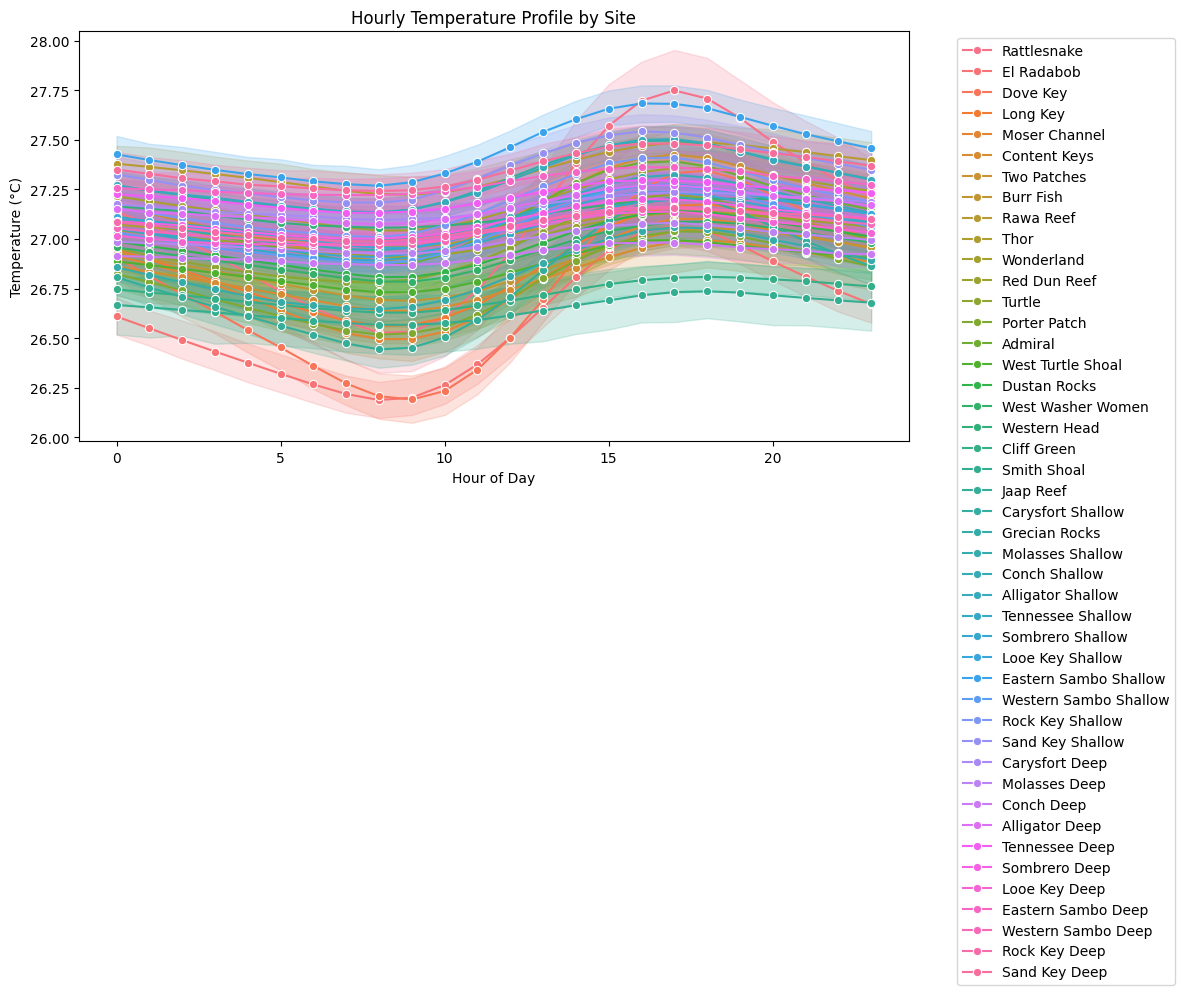

In [10]:

df["Datetime"] = pd.to_datetime(df[["Year", "Month", "Day"]]) + pd.to_timedelta(df["Time"], unit="h")

# --- Plot 1: Hourly Temperature Profile ---
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x="Time", y="TempC", hue="Site_name", marker="o")
plt.title("Hourly Temperature Profile by Site")
plt.xlabel("Hour of Day")
plt.ylabel("Temperature (°C)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig("../plots/hourly_temperature_profile.png")
plt.show()
plt.close()

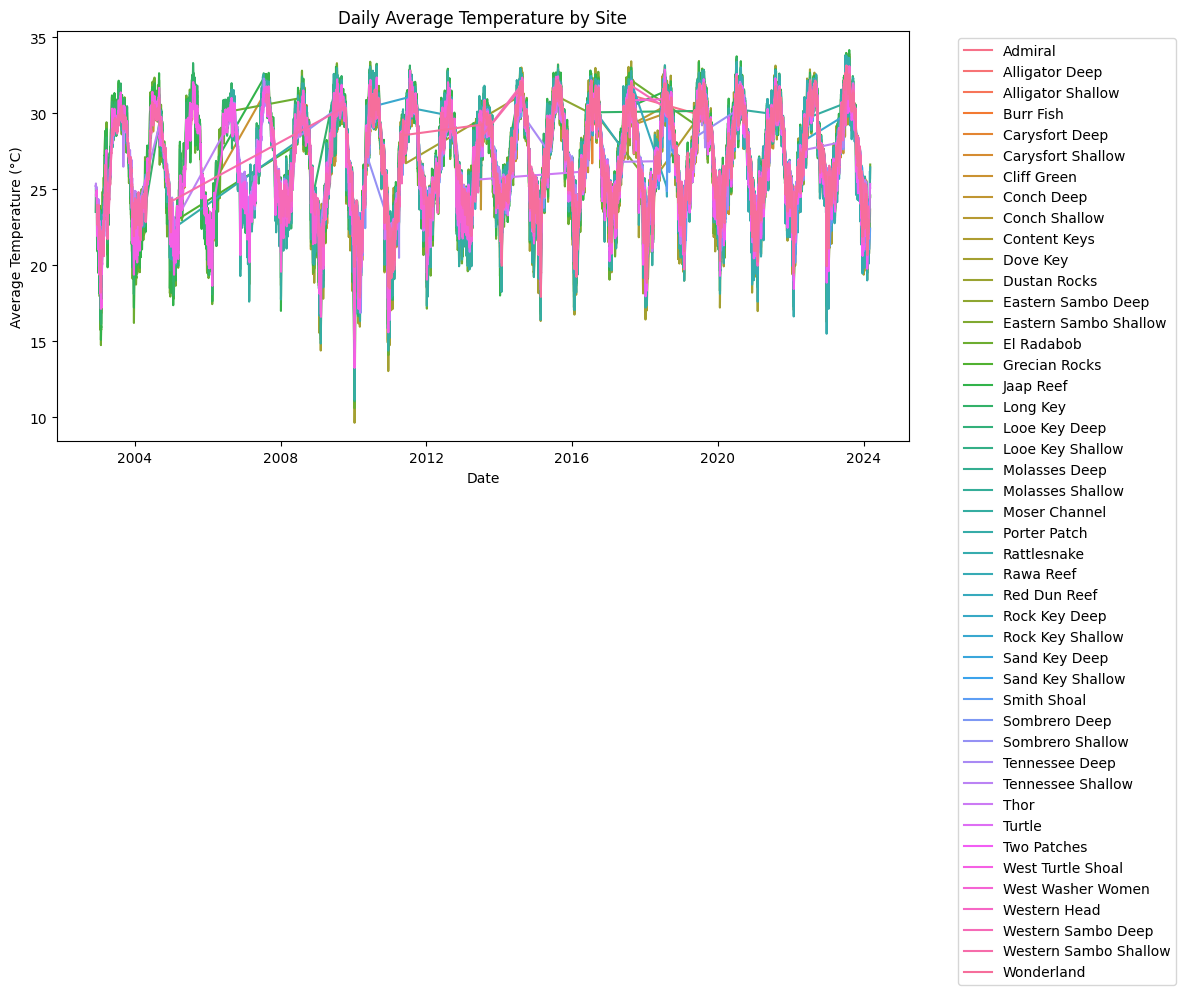

In [13]:
# --- Plot 2: Daily Average Temperature (for multi-day data) ---
if df["Day"].nunique() > 1:
    daily_avg = df.groupby(["Site_name", "Year", "Month", "Day"])["TempC"].mean().reset_index()
    daily_avg["Date"] = pd.to_datetime(daily_avg[["Year", "Month", "Day"]])
    plt.figure(figsize=(12, 8))
    sns.lineplot(data=daily_avg, x="Date", y="TempC", hue="Site_name")
    plt.title("Daily Average Temperature by Site")
    plt.xlabel("Date")
    plt.ylabel("Average Temperature (°C)")
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.savefig("../plots/daily_avg_temperature.png")
    plt.show()
    plt.close()

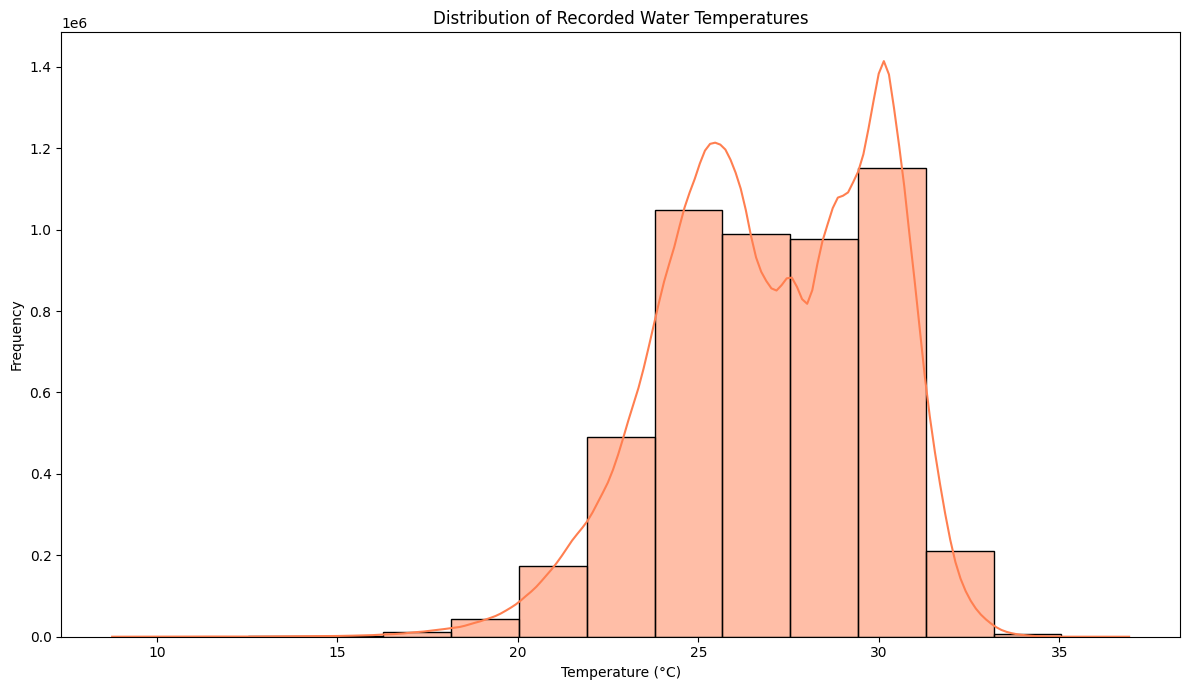

In [12]:
# --- Plot 3: Temperature Distribution ---
plt.figure(figsize=(12, 7))
sns.histplot(df["TempC"], bins=15, kde=True, color="coral")
plt.title("Distribution of Recorded Water Temperatures")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.savefig("../plots/temperature_distribution.png")
plt.show()
plt.close()